In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import glob

In [90]:
# Get all file names in the folder
def get_files(filepath):
    all_files=[]
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.json'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files

In [91]:
# Merge all daily json files in the foler to one data frame
daily = get_files("daily_top50")
daily_list=[]
for file in daily:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    daily_list.append(json_data)
daily_all = pd.concat(daily_list)

In [92]:
# output each country's average value of each music feature
daily_mean = daily_all.groupby("country", as_index=False)[["popularity","explicit","danceability","energy","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]].mean()

# normalize columns in daily_mean
cols_to_multiply=["explicit","danceability","energy","mode","speechiness","acousticness","instrumentalness","liveness","valence"]
daily_mean[cols_to_multiply] = daily_mean[cols_to_multiply].apply(lambda x: x*100) 

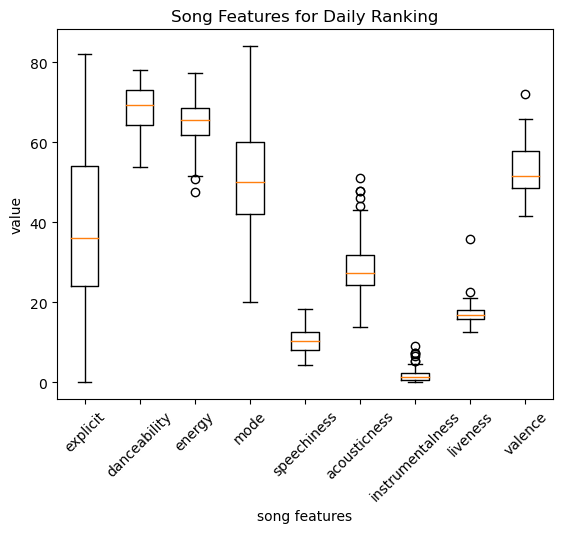

In [102]:
# create boxplot for all features
daily_boxplot = daily_mean[cols_to_multiply]
boxplot = plt.boxplot(np.array(daily_boxplot),labels=["explicit","danceability","energy","mode","speechiness","acousticness","instrumentalness","liveness","valence"])
plt.title("Song Features for Daily Ranking")
plt.ylabel("value")
plt.xlabel("song features")
plt.xticks(rotation=45)
plt.show()

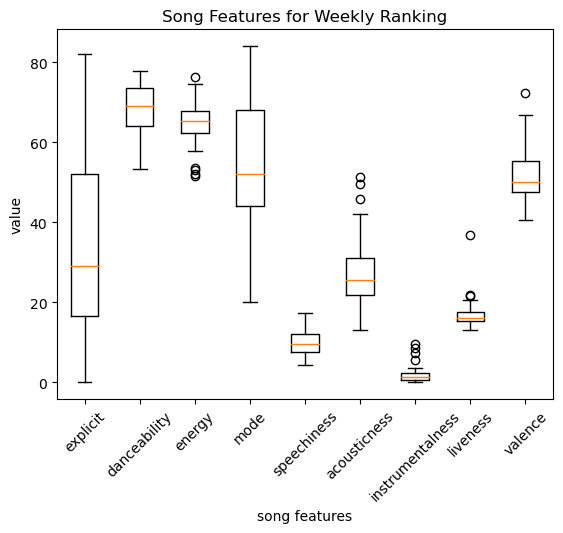

In [103]:
# Merge all weekly json files in the foler to one data frame
weekly = get_files("weekly_top50")
weekly_list=[]
for file in weekly:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    weekly_list.append(json_data)
weekly_all = pd.concat(weekly_list)

# output each country's average value of each music feature
weekly_mean = weekly_all.groupby("country", as_index=False)[["popularity","explicit","danceability","energy","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]].mean()

# normalize columns in daily_mean
weekly_mean[cols_to_multiply] = weekly_mean[cols_to_multiply].apply(lambda x: x*100) 

# create boxplot for all features
weekly_boxplot = weekly_mean[cols_to_multiply]
boxplot = plt.boxplot(np.array(weekly_boxplot),labels=["explicit","danceability","energy","mode","speechiness","acousticness","instrumentalness","liveness","valence"])
plt.title("Song Features for Weekly Ranking")
plt.ylabel("value")
plt.xlabel("song features")
plt.xticks(rotation=45)
plt.show()

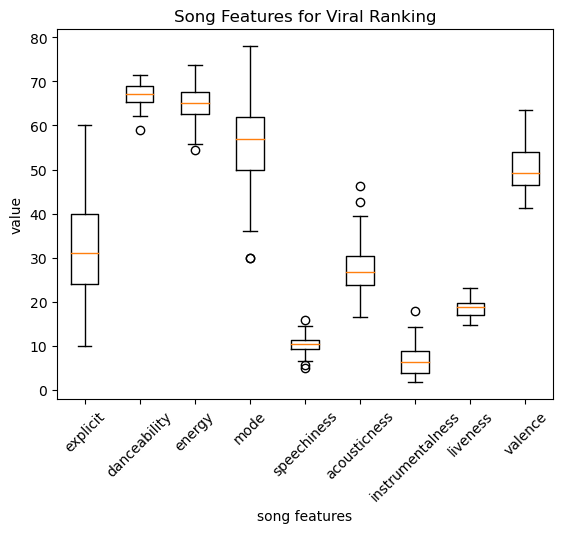

In [104]:
# Merge all viral json files in the foler to one data frame
viral = get_files("viral_top50")
viral_list=[]
for file in viral:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    viral_list.append(json_data)
viral_all = pd.concat(viral_list)

# output each country's average value of each music feature
viral_mean = viral_all.groupby("country", as_index=False)[["popularity","explicit","danceability","energy","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]].mean()

# normalize columns in daily_mean
viral_mean[cols_to_multiply] = viral_mean[cols_to_multiply].apply(lambda x: x*100) 

# create boxplot for all features
viral_boxplot = viral_mean[cols_to_multiply]
boxplot = plt.boxplot(np.array(viral_boxplot),labels=["explicit","danceability","energy","mode","speechiness","acousticness","instrumentalness","liveness","valence"])
plt.title("Song Features for Viral Ranking")
plt.ylabel("value")
plt.xlabel("song features")
plt.xticks(rotation=45)
plt.show()